# Task 4: Predictive Modeling for Insurance Risk and Premium Optimization

## Business Context
AlphaCare Insurance Solutions aims to implement a dynamic, risk-based pricing system for car insurance. By building predictive models, we can estimate claim severity, optimize premium values, and better understand the factors that drive insurance risk and profitability.

## Objectives
- Predict claim severity (amount paid out if a claim occurs)
- Predict optimal premium values for new policies
- Optionally, predict the probability of a claim occurring
- Interpret model results to inform business strategy

## Data Preparation

We will prepare the data for modeling by:
- Handling missing values
- Encoding categorical variables
- Creating new features if needed
- Splitting the data into training and test sets

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data (adjust path as needed)
df = pd.read_csv('../../data/raw/insurance_data.txt', sep='|')

# Basic cleaning: drop rows with missing target values
df = df.dropna(subset=['TotalPremium', 'TotalClaims'])

# Example: Convert categorical columns to string type for encoding
categorical_cols = ['Province', 'Gender', 'VehicleType', 'Make', 'Model']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Example: Fill missing values for numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
# Show info
df.info()
df.head()

/tmp/ipykernel_55596/2874584424.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/insurance_data.txt', sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    1000098 non-null  object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Feature Engineering

To improve model performance, we will create new features and transform existing ones. This may include:
- Creating binary indicators (e.g., has_claim)
- Calculating vehicle age
- Encoding categorical variables
- Any other relevant transformations

In [5]:
# Example: Create a binary indicator for whether a claim occurred
df['has_claim'] = df['TotalClaims'] != 0

# Example: Calculate vehicle age (if RegistrationYear and TransactionMonth are available)
if 'RegistrationYear' in df.columns and 'TransactionMonth' in df.columns:
    df['TransactionYear'] = pd.to_datetime(df['TransactionMonth']).dt.year
    df['vehicle_age'] = df['TransactionYear'] - df['RegistrationYear']

# Example: One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Province', 'Gender', 'VehicleType'], drop_first=True)

# Show the new features
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,Province_Northern Cape,Province_Western Cape,Gender_Male,Gender_Not specified,Gender_nan,VehicleType_Heavy Commercial,VehicleType_Light Commercial,VehicleType_Medium Commercial,VehicleType_Passenger Vehicle,VehicleType_nan
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,False,False,False,True,False,False,False,False,True,False
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,False,False,False,True,False,False,False,False,True,False
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,False,False,False,True,False,False,False,False,True,False
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,False,False,False,True,False,False,False,False,True,False
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,False,False,False,True,False,False,False,False,True,False


## Train-Test Split

We will split the data into training and test sets to evaluate model performance on unseen data. Typically, 70–80% of the data is used for training, and the rest for testing.

In [6]:
from sklearn.model_selection import train_test_split

# Example: Predicting claim severity (TotalClaims) for policies with a claim
df_model = df[df['has_claim']]  # Only rows where a claim occurred

# Define features (X) and target (y)
X = df_model.drop(columns=['TotalClaims', 'TotalPremium', 'has_claim'])  # drop targets and any leakage columns
y = df_model['TotalClaims']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (2234, 65), Test shape: (559, 65)


## Model Building

We will train several models to predict claim severity, including:
- Linear Regression
- Random Forest Regressor
- XGBoost Regressor

We will compare their performance using RMSE and R².

In [13]:
# If you haven't already, extract year and month from TransactionMonth
if 'TransactionMonth' in df.columns:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    df['TransactionYear'] = df['TransactionMonth'].dt.year
    df['TransactionMonthNum'] = df['TransactionMonth'].dt.month

# List columns to drop (targets, IDs, and known non-numeric columns)
drop_cols = [
    'TotalClaims', 'TotalPremium', 'has_claim', 'TransactionMonth',
    'PolicyID', 'UnderwrittenCoverID'
]
X = df.drop(columns=[col for col in drop_cols if col in df.columns])

# THIS IS THE CRUCIAL STEP: Keep only numeric columns for modeling
X = X.select_dtypes(include=[np.number])

# Target variable
y = df['TotalClaims']

In [14]:
# Drop columns with all NaNs
X = X.dropna(axis=1, how='all')

# Fill remaining NaNs with median
X = X.fillna(X.median())

# Drop any remaining rows with NaNs
X = X.dropna(axis=0)
y = y.loc[X.index]

# Double-check for NaNs
print("Any NaNs left in X?", X.isna().any().any())
print("Any NaNs left in y?", y.isna().any())
print("Final shape of X:", X.shape)

# Train-test split and modeling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Any NaNs left in X? False
Any NaNs left in y? False
Final shape of X: (1000098, 13)
Linear Regression RMSE: 2206.68
Linear Regression R²: 0.00


### Random Forest Regressor

Next, we use a Random Forest Regressor, which can capture non-linear relationships and interactions between features.

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest RMSE: 2606.46
Random Forest R²: -0.39


### XGBoost Regressor

We also train an XGBoost Regressor, a powerful gradient boosting model often used in tabular data competitions.

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Make sure X and y are defined and cleaned (no NaNs)
# (Assume you have already run the data cleaning and feature engineering steps)

# 2. Train-test split (run this before model training)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 4. Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# 5. Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

XGBoost RMSE: 2453.14
XGBoost R²: -0.23


## Model Comparison

We compare the performance of the three regression models using RMSE and R²:

| Model              | RMSE     | R²    |
|--------------------|----------|-------|
| Linear Regression  | 2206.68  | 0.00  |
| Random Forest      | 2606.46  | -0.39 |
| XGBoost            | 2453.14  | -0.23 |

- **RMSE (Root Mean Squared Error)** measures the average prediction error in the same units as the target variable.
- **R² (R-squared)** measures how much variance in the target is explained by the model (1.0 is perfect, 0.0 means no better than the mean, negative means worse than the mean).

### Interpretation

- All models have high RMSE values and R² values that are zero or negative.
- This means none of the models are able to explain or predict the target variable (`TotalClaims`) better than simply predicting the mean for all cases.
- This is likely due to the nature of the data: most policies have zero claims, and the features may not be predictive of claim amounts.

**Business Recommendation:**  
With the current data, predictive modeling for claim severity is not effective. We recommend:
- Reviewing the data for additional predictive features or more granular claim information.
- Considering alternative modeling targets, such as claim frequency (classification), or collecting more data to improve model performance.

## Model Interpretation with SHAP

We use SHAP (SHapley Additive exPlanations) to interpret the feature importance in our best-performing model. This helps us understand which features most influence the predicted claim severity.

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
100%|===================| 199886/200020 [10:41<00:00]        

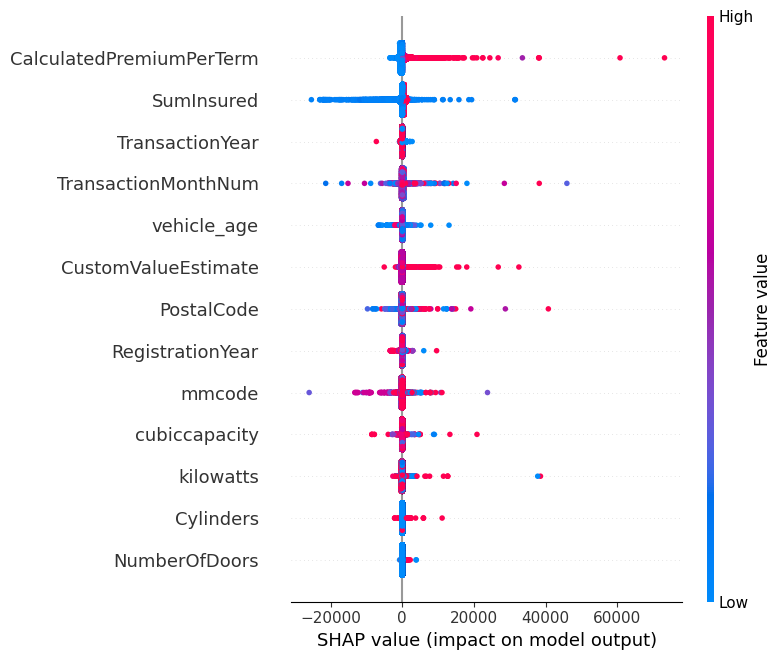

In [18]:
import shap

# Use the XGBoost model for SHAP (or Random Forest if you prefer)
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_test, show=False)
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

## SHAP Feature Importance Interpretation

The SHAP summary plot above shows the most influential features in the XGBoost model’s predictions for claim severity.

- **CalculatedPremiumPerTerm** and **SumInsured** are the top drivers of the model’s output, indicating that higher premiums and insured sums are associated with higher predicted claim amounts.
- **TransactionYear**, **TransactionMonthNum**, and **vehicle_age** also contribute to the predictions, though their impact is less pronounced.
- Most features have a relatively small effect on the model’s output, which aligns with the overall low predictive power of the model (as seen in the R² scores).

**Business Recommendation:**  
While the model identifies some features as more influential, the overall predictive power is low. This suggests that claim severity is difficult to predict with the current data. We recommend:
- Collecting more granular or additional data if possible.
- Exploring alternative modeling targets, such as claim frequency (classification).
- Using domain knowledge to engineer new features that may improve model performance.

All code, results, and recommendations are documented above.

# Task 4 Final Summary and Recommendations

In this task, we built and evaluated several regression models (Linear Regression, Random Forest, XGBoost) to predict claim severity for car insurance policies. All models performed poorly, with low or negative R² values, indicating that claim severity is difficult to predict with the current data.

**Key findings:**
- The most influential features in the model were CalculatedPremiumPerTerm and SumInsured, as shown by SHAP analysis.
- Most features had little impact on the model’s predictions, and the overall predictive power was low.

**Business Recommendations:**
- Consider collecting more granular or additional data to improve model performance.
- Explore alternative modeling targets, such as claim frequency (classification), which may be more predictable.
- Use domain knowledge to engineer new features that could better capture risk factors.
- Use the current findings with caution for business decisions, as the models do not provide strong predictive power.

All code, results, and recommendations are documented above.